In [ ]:
!pip install git+https://github.com/EnergyBasedFlowClassifier/EFC-package

  Cloning https://github.com/EnergyBasedFlowClassifier/EFC-package to /tmp/pip-req-build-6l5pjs97
  Running command git clone --filter=blob:none --quiet https://github.com/EnergyBasedFlowClassifier/EFC-package /tmp/pip-req-build-6l5pjs97
  Resolved https://github.com/EnergyBasedFlowClassifier/EFC-package to commit 75ca0afb3e9259d6a87db16bf0e850167355a7d4
  Preparing metadata (setup.py) ... done
  Created wheel for efc: filename=efc-0.1.0-cp311-cp311-linux_x86_64.whl size=500927 sha256=9bd978c283aac4305f5398f8479df59f46db2097363cfe62f3dd462e4fcb04b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-6eyrqxne/wheels/37/21/6c/98860b7c505eb0b8b6bdc8c34042ecdd6ca2f3529091bb81e8
Successfully built efc


In [ ]:
#@title Import Drive

# from google.colab import drive
# drive.flush_and_unmount()
# print('Drive desvinculado!')
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


## Carregar datasets

In [ ]:
#@title carregando dataset e separando as labels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CTU Dataset preprocessado

CTU_all_scenarios = pd.read_csv('/content/drive/MyDrive/dataset/CTU13/csv_labels/pre_bin_all_scenarios_data.csv')
CTU_all_scenarios = CTU_all_scenarios.sample(frac=1, random_state=42).reset_index(drop=True)

#isot Dataset preprocessado

isot_HTTP_all = pd.read_csv('/content/drive/MyDrive/dataset/ISOT-HTTP/csv_labels/pre_bin_all_data_isot.csv')
isot_HTTP_all = isot_HTTP_all.sample(frac=1, random_state=42).reset_index(drop=True)



## Serapação pro treinamento

In [ ]:
display(CTU_all_scenarios)

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,5330563,4,4,1092.0,560.0,1080.0,0.0,273.000000,538.007435,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
1,443,5233994,6,4,611.0,168.0,517.0,0.0,101.833333,204.305082,...,20,156142.0,0.000000,156142,156142,5077849.0,0.00000,5077849.0,5077849.0,0
2,443,4200,3,0,43.0,0.0,31.0,6.0,14.333333,14.433757,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
3,53,196,2,2,102.0,224.0,51.0,51.0,51.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
4,49590,2,3,0,43.0,0.0,31.0,6.0,14.333333,14.433757,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627380,443,10388444,5,4,580.0,164.0,517.0,0.0,116.000000,225.101088,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
627381,61838,3,2,0,37.0,0.0,31.0,6.0,18.500000,17.677670,...,20,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
627382,53,60940,1,1,43.0,113.0,43.0,43.0,43.000000,0.000000,...,32,0.0,0.000000,0,0,0.0,0.00000,0.0,0.0,0
627383,443,118257452,20,17,1042.0,5007.0,442.0,0.0,52.100000,108.083253,...,32,485453.0,501898.736432,840349,130557,58599500.5,387063.88806,58873196.0,58325805.0,0


In [ ]:
#@title Separando o all_bening para os dois devices CTU
porcentagem = 0.25
split_index = int(len(CTU_all_scenarios) * porcentagem)

CTU_all_scenarios_1, CTU_all_scenarios_2, CTU_all_scenarios_3, CTU_all_scenarios_4 = CTU_all_scenarios[:split_index] , CTU_all_scenarios[split_index:2*split_index] , CTU_all_scenarios[2*split_index:3*split_index], CTU_all_scenarios[3*split_index:]
CTU_server_fit = CTU_all_scenarios_1[:int(0.2*len(CTU_all_scenarios_1))]
CTU_testes = CTU_all_scenarios[:2*split_index]

print(len(CTU_all_scenarios_1), np.unique(CTU_all_scenarios_1['Label']))
print(len(CTU_all_scenarios_2), np.unique(CTU_all_scenarios_2['Label']))
print(len(CTU_all_scenarios_3), np.unique(CTU_all_scenarios_3['Label']))
print(len(CTU_all_scenarios_4), np.unique(CTU_all_scenarios_4['Label']))
print(CTU_all_scenarios_1['Label'].value_counts())
print(CTU_all_scenarios_2['Label'].value_counts())
print(CTU_all_scenarios_3['Label'].value_counts())
print(CTU_all_scenarios_4['Label'].value_counts())

y_CTU_all_scenarios_1 = CTU_all_scenarios_1['Label']
X_CTU_all_scenarios_1 = CTU_all_scenarios_1.drop('Label', axis=1)
X_CTU_all_scenarios_1 = X_CTU_all_scenarios_1.apply(lambda x: np.nan_to_num(x))

y_CTU_all_scenarios_2 = CTU_all_scenarios_2['Label']
X_CTU_all_scenarios_2 = CTU_all_scenarios_2.drop('Label', axis=1)
X_CTU_all_scenarios_2 = X_CTU_all_scenarios_2.apply(lambda x: np.nan_to_num(x))

y_CTU_all_scenarios_3 = CTU_all_scenarios_3['Label']
X_CTU_all_scenarios_3 = CTU_all_scenarios_3.drop('Label', axis=1)
X_CTU_all_scenarios_3 = X_CTU_all_scenarios_3.apply(lambda x: np.nan_to_num(x))

y_CTU_all_scenarios_4 = CTU_all_scenarios_4['Label']
X_CTU_all_scenarios_4 = CTU_all_scenarios_4.drop('Label', axis=1)
X_CTU_all_scenarios_4 = X_CTU_all_scenarios_4.apply(lambda x: np.nan_to_num(x))

y_CTU_testes = CTU_testes['Label']
X_CTU_testes = CTU_testes.drop('Label', axis=1)
X_CTU_testes = X_CTU_testes.apply(lambda x: np.nan_to_num(x))

y_CTU_server_fit = CTU_server_fit['Label']
X_CTU_server_fit = CTU_server_fit.drop('Label', axis=1)
X_CTU_server_fit = X_CTU_server_fit.apply(lambda x: np.nan_to_num(x))

'''
print(len(CTU_benign_scenarios_train), np.unique(CTU_benign_scenarios_train['Label']))
print(len(CTU_all_bot_scenarios_test), np.unique(CTU_all_bot_scenarios_test['Label']))

y_CTU_benign_scenarios_train = CTU_benign_scenarios_train['Label']
X_CTU_benign_scenarios_train = CTU_benign_scenarios_train.drop('Label', axis=1)
X_CTU_benign_scenarios_train = X_CTU_benign_scenarios_train.apply(lambda x: np.nan_to_num(x))
'''

156846 [0 1]
156846 [0 1]
156846 [0 1]
156847 [0 1]
Label
0    132445
1     24401
Name: count, dtype: int64
Label
0    132652
1     24194
Name: count, dtype: int64
Label
0    132517
1     24329
Name: count, dtype: int64
Label
0    132304
1     24543
Name: count, dtype: int64


"\nprint(len(CTU_benign_scenarios_train), np.unique(CTU_benign_scenarios_train['Label']))\nprint(len(CTU_all_bot_scenarios_test), np.unique(CTU_all_bot_scenarios_test['Label']))\n\ny_CTU_benign_scenarios_train = CTU_benign_scenarios_train['Label']\nX_CTU_benign_scenarios_train = CTU_benign_scenarios_train.drop('Label', axis=1)\nX_CTU_benign_scenarios_train = X_CTU_benign_scenarios_train.apply(lambda x: np.nan_to_num(x))\n"

In [ ]:
#@title Separando o all_bening para os dois devices ISOT
porcentagem = 0.25
split_index = int(len(isot_HTTP_all) * porcentagem)

isot_HTTP_all_1, isot_HTTP_all_2, isot_HTTP_all_3, isot_HTTP_all_4 = isot_HTTP_all[:split_index] , isot_HTTP_all[split_index:2*split_index] , isot_HTTP_all[2*split_index:3*split_index], isot_HTTP_all[3*split_index:]
isot_server_fit = isot_HTTP_all_1[:int(0.2*len(isot_HTTP_all_1))]
isot_HTTP_testes = isot_HTTP_all[:2*split_index]

print(len(isot_HTTP_all_1), np.unique(isot_HTTP_all_1['Label']))
print(len(isot_HTTP_all_2), np.unique(isot_HTTP_all_2['Label']))
print(len(isot_HTTP_all_3), np.unique(isot_HTTP_all_3['Label']))
print(len(isot_HTTP_all_4), np.unique(isot_HTTP_all_4['Label']))
print(isot_HTTP_all_1['Label'].value_counts())
print(isot_HTTP_all_2['Label'].value_counts())
print(isot_HTTP_all_3['Label'].value_counts())
print(isot_HTTP_all_4['Label'].value_counts())

y_isot_server_fit = isot_server_fit['Label']
X_isot_server_fit = isot_server_fit.drop('Label', axis=1)
X_isot_server_fit = X_isot_server_fit.apply(lambda x: np.nan_to_num(x))

y_isot_HTTP_all_1 = isot_HTTP_all_1['Label']
X_isot_HTTP_all_1 = isot_HTTP_all_1.drop('Label', axis=1)
X_isot_HTTP_all_1 = X_isot_HTTP_all_1.apply(lambda x: np.nan_to_num(x))

y_isot_HTTP_all_2 = isot_HTTP_all_2['Label']
X_isot_HTTP_all_2 = isot_HTTP_all_2.drop('Label', axis=1)
X_isot_HTTP_all_2 = X_isot_HTTP_all_2.apply(lambda x: np.nan_to_num(x))

y_isot_HTTP_all_3 = isot_HTTP_all_3['Label']
X_isot_HTTP_all_3 = isot_HTTP_all_3.drop('Label', axis=1)
X_isot_HTTP_all_3 = X_isot_HTTP_all_3.apply(lambda x: np.nan_to_num(x))

y_isot_HTTP_all_4 = isot_HTTP_all_4['Label']
X_isot_HTTP_all_4 = isot_HTTP_all_4.drop('Label', axis=1)
X_isot_HTTP_all_4 = X_isot_HTTP_all_4.apply(lambda x: np.nan_to_num(x))

y_isot_HTTP_testes = isot_HTTP_testes['Label']
X_isot_HTTP_testes = isot_HTTP_testes.drop('Label', axis=1)
X_isot_HTTP_testes = X_isot_HTTP_testes.apply(lambda x: np.nan_to_num(x))


110802 [0 1]
110802 [0 1]
110802 [0 1]
110805 [0 1]
Label
1    91465
0    19337
Name: count, dtype: int64
Label
1    91775
0    19027
Name: count, dtype: int64
Label
1    91676
0    19126
Name: count, dtype: int64
Label
1    91817
0    18988
Name: count, dtype: int64


In [ ]:
#@title separando labels para o treino e teste CTU

from sklearn.model_selection import train_test_split

X_CTU_all_train_1, X_CTU_all_test_1, y_CTU_all_train_1, y_CTU_all_test_1 = train_test_split(X_CTU_all_scenarios_1, y_CTU_all_scenarios_1, test_size=0.75, random_state=42, stratify=y_CTU_all_scenarios_1)
X_CTU_all_train_2, X_CTU_all_test_2, y_CTU_all_train_2, y_CTU_all_test_2 = train_test_split(X_CTU_all_scenarios_2, y_CTU_all_scenarios_2, test_size=0.999, random_state=42, stratify=y_CTU_all_scenarios_2)
X_CTU_all_train_3, X_CTU_all_test_3, y_CTU_all_train_3, y_CTU_all_test_3 = train_test_split(X_CTU_all_scenarios_3, y_CTU_all_scenarios_3, test_size=0.25, random_state=42, stratify=y_CTU_all_scenarios_3)
X_CTU_all_train_4, X_CTU_all_test_4, y_CTU_all_train_4, y_CTU_all_test_4 = train_test_split(X_CTU_all_scenarios_4, y_CTU_all_scenarios_4, test_size=0.999, random_state=42, stratify=y_CTU_all_scenarios_4)

print(len(X_CTU_all_train_1), np.unique(y_CTU_all_train_1))
print(len(X_CTU_all_test_1), np.unique(y_CTU_all_test_1))

print(len(X_CTU_all_train_2), np.unique(y_CTU_all_train_2))
print(len(X_CTU_all_test_2), np.unique(y_CTU_all_test_2))

print(len(X_CTU_all_train_3), np.unique(y_CTU_all_train_3))
print(len(X_CTU_all_test_3), np.unique(y_CTU_all_test_3))

print(len(X_CTU_all_train_4), np.unique(y_CTU_all_train_4))
print(len(X_CTU_all_test_4), np.unique(y_CTU_all_test_4))

print(y_CTU_all_train_1.value_counts())
print(y_CTU_all_train_2.value_counts())
print(y_CTU_all_train_3.value_counts())
print(y_CTU_all_train_4.value_counts())

print(y_CTU_all_test_1.value_counts())
print(y_CTU_all_test_2.value_counts())
print(y_CTU_all_test_3.value_counts())
print(y_CTU_all_test_4.value_counts())

training_data_CTU   = [X_CTU_all_train_1, X_CTU_all_train_2,X_CTU_all_scenarios_3,X_CTU_all_scenarios_4]
training_labels_CTU = [y_CTU_all_train_1, y_CTU_all_train_2,y_CTU_all_scenarios_3,y_CTU_all_scenarios_4]

testing_data_CTU   = [X_CTU_all_test_1, X_CTU_all_test_2,X_CTU_all_test_3,X_CTU_all_test_4]
testing_labels_CTU = [y_CTU_all_test_1, y_CTU_all_test_2,y_CTU_all_test_3,y_CTU_all_test_4]


39211 [0 1]
117635 [0 1]
156 [0 1]
156690 [0 1]
117634 [0 1]
39212 [0 1]
156 [0 1]
156691 [0 1]
Label
0    33111
1     6100
Name: count, dtype: int64
Label
0    132
1     24
Name: count, dtype: int64
Label
0    99387
1    18247
Name: count, dtype: int64
Label
0    132
1     24
Name: count, dtype: int64
Label
0    99334
1    18301
Name: count, dtype: int64
Label
0    132520
1     24170
Name: count, dtype: int64
Label
0    33130
1     6082
Name: count, dtype: int64
Label
0    132172
1     24519
Name: count, dtype: int64


In [ ]:
#@title separando labels para o treino e teste ISOT

from sklearn.model_selection import train_test_split

X_isot_all_train_1, X_isot_all_test_1, y_isot_all_train_1, y_isot_all_test_1 = train_test_split(X_isot_HTTP_all_1, y_isot_HTTP_all_1, test_size=0.75, random_state=42, stratify=y_isot_HTTP_all_1)
X_isot_all_train_2, X_isot_all_test_2, y_isot_all_train_2, y_isot_all_test_2 = train_test_split(X_isot_HTTP_all_2, y_isot_HTTP_all_2, test_size=0.999, random_state=42, stratify=y_isot_HTTP_all_2)
X_isot_all_train_3, X_isot_all_test_3, y_isot_all_train_3, y_isot_all_test_3 = train_test_split(X_isot_HTTP_all_3, y_isot_HTTP_all_3, test_size=0.25, random_state=42, stratify=y_isot_HTTP_all_3)
X_isot_all_train_4, X_isot_all_test_4, y_isot_all_train_4, y_isot_all_test_4 = train_test_split(X_isot_HTTP_all_4, y_isot_HTTP_all_4, test_size=0.999, random_state=42, stratify=y_isot_HTTP_all_4)

print(len(X_isot_all_train_1), np.unique(y_isot_all_train_1))
print(len(X_isot_all_test_1), np.unique(y_isot_all_test_1))

print(len(X_isot_all_train_2), np.unique(y_isot_all_train_2))
print(len(X_isot_all_test_2), np.unique(y_isot_all_test_2))

print(len(X_isot_all_train_3), np.unique(y_isot_all_train_3))
print(len(X_isot_all_test_3), np.unique(y_isot_all_test_3))

print(len(X_isot_all_train_4), np.unique(y_isot_all_train_4))
print(len(X_isot_all_test_4), np.unique(y_isot_all_test_4))

print(y_isot_all_train_1.value_counts())
print(y_isot_all_train_2.value_counts())
print(y_isot_all_train_3.value_counts())
print(y_isot_all_train_4.value_counts())

print(y_isot_all_test_1.value_counts())
print(y_isot_all_test_2.value_counts())
print(y_isot_all_test_3.value_counts())
print(y_isot_all_test_4.value_counts())

training_data_isot = [X_isot_all_train_1, X_isot_all_train_2,X_isot_HTTP_all_3,X_isot_HTTP_all_4]
training_labels_isot = [y_isot_all_train_1, y_isot_all_train_2,y_isot_HTTP_all_3,y_isot_HTTP_all_4]

testing_data_isot = [X_isot_all_test_1, X_isot_all_test_2,X_isot_HTTP_all_3,X_isot_HTTP_all_4]
testing_labels_isot = [y_isot_all_test_1, y_isot_all_test_2,y_isot_HTTP_all_3,y_isot_HTTP_all_4]


27700 [0 1]
83102 [0 1]
110 [0 1]
110692 [0 1]
83101 [0 1]
27701 [0 1]
110 [0 1]
110695 [0 1]
Label
1    22866
0     4834
Name: count, dtype: int64
Label
1    91
0    19
Name: count, dtype: int64
Label
1    68757
0    14344
Name: count, dtype: int64
Label
1    91
0    19
Name: count, dtype: int64
Label
1    68599
0    14503
Name: count, dtype: int64
Label
1    91684
0    19008
Name: count, dtype: int64
Label
1    22919
0     4782
Name: count, dtype: int64
Label
1    91726
0    18969
Name: count, dtype: int64


In [ ]:
#@title Calcular pesos ( Tem 2 tipos )

import numpy as np

# pesos = 1 / (1 + exp(-alpha * (F1_score - F1_score_min)))
def normalização_Logistica(f1_scores, alpha=3.0, f1_limite=0.6, w_min=0.01):
  f1_min, f1_max = min(f1_scores), max(f1_scores)
  pesos = [1 / (1 + np.exp(-alpha * (f - f1_min))) for f in f1_scores]

  # Ajustar dispositivos com F1 muito baixo
  for i, f1 in enumerate(f1_scores):
        if f1 < f1_limite * f1_max:
            pesos[i] = w_min

  # Recalibrar os pesos para somar 1
  soma_pesos = sum(pesos)
  pesos = [p / soma_pesos for p in pesos]

  return pesos

def calcular_pesos(f1_scores, alpha=4.0, f1_limite=0.6, w_min=0.01):
    # Normalizar F1-scores
    f1_min, f1_max = min(f1_scores), max(f1_scores)
    f1_normalizados = [(f - f1_min) / (f1_max - f1_min) for f in f1_scores]

    # Aplicar suavização exponencial (softmax) para scores proximos
    # peso = exp(alpha * F1_score) / soma_exp_F1_score
    exp_scores = [np.exp(alpha * f) for f in f1_normalizados]
    total_exp = sum(exp_scores)
    pesos = [e / total_exp for e in exp_scores]

    # Ajustar dispositivos com F1 muito baixo
    for i, f1 in enumerate(f1_scores):
        if f1 < f1_limite * f1_max:
            pesos[i] = w_min

    # Recalibrar os pesos para somar 1
    #soma_pesos = sum(pesos)
    #pesos = [p / soma_pesos for p in pesos]

    return pesos

def peso_normalizado(f1_scores,f1_limite=0.6, w_min=0.01):
  pesos = [1 / (1 + np.exp(-f)) for f in f1_scores]
  f1_max = max(f1_scores)

  for i, f1 in enumerate(f1_scores):
        if f1 < f1_limite * f1_max:
            pesos[i] = w_min
  return pesos


# Exemplo de uso
f1_scores = [0.99, 0.98, 0.97, 0.80, 0.75, 0.70, 0.50]
pesos = calcular_pesos(f1_scores)
print("Pesos:", pesos)
#diferenca1 = [pesos[i] - pesos[i+1] for i in range(len(pesos)-1)]
#print('deiferença: ', diferenca1)
#pesos = normalização_Logistica(f1_scores)
#print("Pesos:", pesos)
#diferenca1 = [pesos[i] - pesos[i+1] for i in range(len(pesos)-1)]
#print('deiferença: ', diferenca1)
pesos = peso_normalizado(f1_scores)
print("Pesos:", pesos)


Pesos: [np.float64(0.3090210098482346), np.float64(0.2847969911106261), np.float64(0.26247188236651026), np.float64(0.06552218970939454), np.float64(0.04356375921981721), np.float64(0.028964250520005178), 0.01]
Pesos: [np.float64(0.7290879223493065), np.float64(0.7271082163411295), np.float64(0.7251194977898231), np.float64(0.6899744811276125), np.float64(0.679178699175393), np.float64(0.6681877721681662), 0.01]


In [ ]:
#@title Servidor de agregação

class ServerEFC:
    def __init__(self, ff,n_devices):
      self.clf = EnergyBasedFlowClassifier(cutoff_quantile = 0.95)
      self.clf.fit(ff[0],ff[1])
      self.devices = n_devices
      self.global_model = None
      self.global_fields = None

    def predict(self, X):
      X = X.apply(lambda x: np.nan_to_num(x))
      return self.clf.predict(X, return_energies=True)

    def fit(self, X, y, base_class = "BENIGN"):
      self.clf.fit(X, y, base_class=base_class)
      return self.clf

    def agregar_modelo_ponderado(self,data,locais,soma_pesos):
      if len(data) == 0 or len(locais) == 0:
            raise ValueError("Os dados locais não podem estar vazios")

      data = np.array(data)
      locais = np.array(locais)

      # Média das matrizes de acoplamento
      self.global_model = np.sum(data, axis = 0) / soma_pesos

      # Média dos vetores de campos locais
      self.global_fields = np.sum(locais, axis = 0) / soma_pesos

      # Atualiza o modelo global
      self.clf.estimators_[0].coupling_matrix_ = self.global_model
      self.clf.estimators_[0].local_field_ = self.global_fields

      return self.global_model, self.global_fields

    def Agregar_treinamento_media_aritmetica(self, data, locais):

      if len(data) == 0 or len(locais) == 0:
              raise ValueError("Os dados locais não podem estar vazios")

      data = np.array(data)
      locais = np.array(locais)

      # Média das matrizes de acoplamento
      self.global_model = np.mean(data, axis=0)

      # Média dos vetores de campos locais
      self.global_fields = np.mean(locais, axis=0)

      # Atualiza o modelo global
      self.clf.estimators_[0].coupling_matrix_ = self.global_model
      self.clf.estimators_[0].local_field_ = self.global_fields

      return self.global_model, self.global_fields

    # Baseline: Previsão sempre como 'BENIGN'
    def baseline_benign(self, X, base_line = 'BENIGN'):
      return [base_line] * len(X)

    # Baseline: Classificação aleatória entre as classes
    def baseline_random(self, X, classes):
      return [choice(classes) for _ in range(len(X))]


In [ ]:
#@title classe EFC

from efc import EnergyBasedFlowClassifier
from sklearn.metrics import f1_score
from random import choice

class EfcModel:
  def __init__(self):
    #self.peso = peso
    self.clf = EnergyBasedFlowClassifier(cutoff_quantile=0.95)


  def predict(self, X):
    X = X.apply(lambda x: np.nan_to_num(x))
    return self.clf.predict(X, return_energies=True)

  def fit(self, X, y, base_class = "BENIGN"):
    self.clf.fit(X, y, base_class=base_class)
    return self.clf



In [ ]:
#@title treinando os devices
n_devices = 4

devices_CTU = [EfcModel() for _ in range(n_devices)]
devices_isot = [EfcModel() for _ in range(n_devices)]

server_CTU = ServerEFC([X_CTU_server_fit,y_CTU_server_fit],n_devices)
server_isot = ServerEFC([X_isot_server_fit,y_isot_server_fit],n_devices)

[devices_CTU[i].fit(training_data_CTU[i],training_labels_CTU[i], base_class = 0) for i in range(n_devices)]
[devices_isot[i].fit(training_data_isot[i],training_labels_isot[i], base_class = 0) for i in range(n_devices)]


[EnergyBasedFlowClassifier(),
 EnergyBasedFlowClassifier(),
 EnergyBasedFlowClassifier(),
 EnergyBasedFlowClassifier()]

In [ ]:
#@title Fazer previsões para cada dispositivo usando um dataset diferente

#data_for_predict = X_CTU_all_scenarios

#predictions_CTU, y_energies_CTU = zip(*[devices_CTU[i].predict(X_CTU_all_scenarios) for i in range(n_devices)])
#predictions_isot, y_energies_isot = zip(*[devices_isot[i].predict(X_isot_HTTP_all) for i in range(n_devices)])

predictions_CTU_1, y_energies_CTU_1 = devices_CTU[0].predict(testing_data_CTU[0])
predictions_CTU_2, y_energies_CTU_2 = devices_CTU[1].predict(testing_data_CTU[1])
predictions_CTU_3, y_energies_CTU_3 = devices_CTU[2].predict(testing_data_CTU[2])
predictions_CTU_4, y_energies_CTU_4 = devices_CTU[3].predict(testing_data_CTU[3])

predictions_isot_1,y_energies_isot_1 = devices_isot[0].predict(testing_data_isot[0])
predictions_isot_2,y_energies_isot_2 = devices_isot[1].predict(testing_data_isot[1])
predictions_isot_3,y_energies_isot_3 = devices_isot[2].predict(testing_data_isot[2])
predictions_isot_4,y_energies_isot_4 = devices_isot[3].predict(testing_data_isot[3])

'''
[predictions_CTU.append(devices_CTU[i].predict(X_CTU_all_scenarios)) for i in range(n_devices)]
[predictions_isot.append(devices_isot[1].predict(X_isot_HTTP_all)) for i in range(n_devices)]
 '''
display(np.unique(predictions_CTU_1))
display(np.unique(predictions_CTU_2))
display(np.unique(predictions_CTU_3))
display(np.unique(predictions_CTU_4))

display(np.unique(predictions_isot_1))
display(np.unique(predictions_isot_2))
display(np.unique(predictions_isot_3))
display(np.unique(predictions_isot_4))


array([0, 1])

array([0, 1])

array([0, 1])

array([0, 1])

array([0, 1])

array([0, 1])

array([0, 1])

array([0, 1])

In [ ]:
#@title Calculado o roc_auc_score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

''' CTU_agreg_pred = y_pred_CTU_agreg
isot_agreg_pred = y_pred_isot_agreg '''

def auc_roc(y_true, y_pred):
    lb = LabelBinarizer()

    lb.fit(y_true)
    y_true_bin = lb.transform(y_true)
    y_pred_bin = lb.transform(y_pred)

    return roc_auc_score(y_true_bin, y_pred_bin, average='weighted')

print(f"auc_roc_score:\n")

'''
print(f"CTU AUC score: {auc_roc(testing_labels_CTU[1],CTU_agreg_pred)}")
print(f"ISOT AUC score: {auc_roc(testing_labels_isot[1],isot_agreg_pred)}")
'''

predictions_CTU = [predictions_CTU_1,predictions_CTU_2,predictions_CTU_3,predictions_CTU_4]
predictions_isot = [predictions_isot_1,predictions_isot_2,predictions_isot_3,predictions_isot_4]

for i in range(4):
  print(f"CTU AUC score:\n\tdevice {i+1} = {auc_roc(testing_labels_CTU[i],predictions_CTU[i])}")
  print(f"ISOT AUC score:\n\tdevice {i+1} = {auc_roc(testing_labels_isot[i],predictions_isot[i])}")

auc_roc_score:

CTU AUC score:
	device 1 = 0.8950972762242235
ISOT AUC score:
	device 1 = 0.9651577422533227
CTU AUC score:
	device 2 = 0.5719740416540899
ISOT AUC score:
	device 2 = 0.6025040161827251
CTU AUC score:
	device 3 = 0.9006192062935435
ISOT AUC score:
	device 3 = 0.9732215563024911
CTU AUC score:
	device 4 = 0.8989924199276494
ISOT AUC score:
	device 4 = 0.9661632004731001


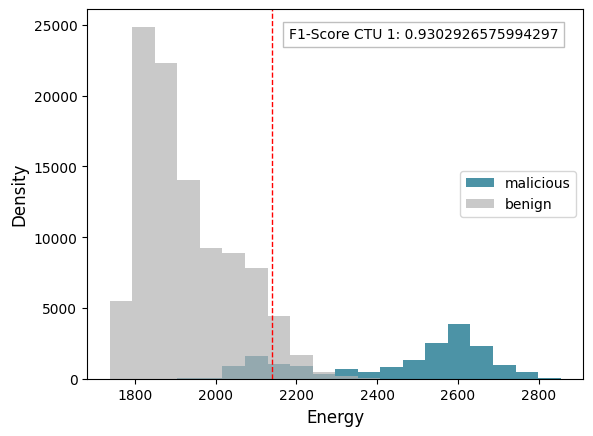

In [ ]:
#@title matplot device 1

from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[0] == 0)[0]
attacks = np.where(testing_labels_CTU[0] != 0)[0]

benign_energies = y_energies_CTU_1[benign]
attacks_energies = y_energies_CTU_1[attacks]

cutoff = devices_CTU[0].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_CTU_1, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)

peso_texto = f"F1-Score CTU 1: 0.9302926575994297"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

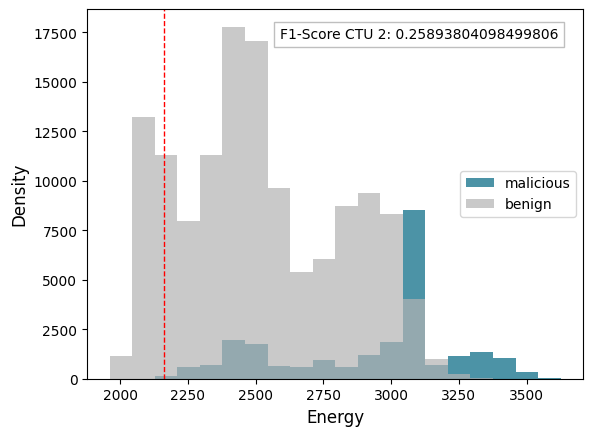

In [ ]:
#@title matplot device 2
from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[1] == 0)[0]
attacks = np.where(testing_labels_CTU[1] != 0)[0]

benign_energies = y_energies_CTU_2[benign]
attacks_energies = y_energies_CTU_2[attacks]

cutoff = devices_CTU[1].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_CTU_2, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"F1-Score CTU 2: 0.25893804098499806"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

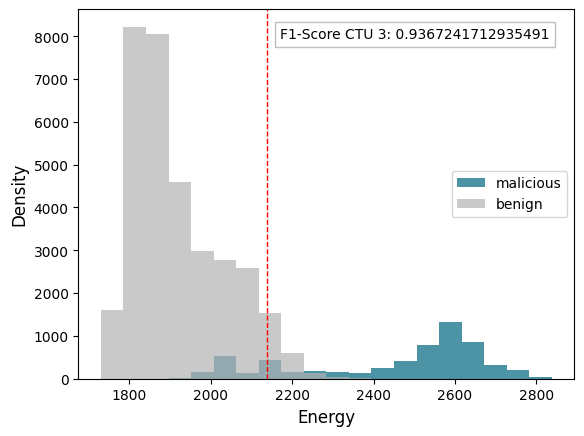

In [ ]:
#@title matplot device 3
from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[2] == 0)[0]
attacks = np.where(testing_labels_CTU[2] != 0)[0]

benign_energies = y_energies_CTU_3[benign]
attacks_energies = y_energies_CTU_3[attacks]

cutoff = devices_CTU[2].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_CTU_3, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"F1-Score CTU 3: 0.9367241712935491"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

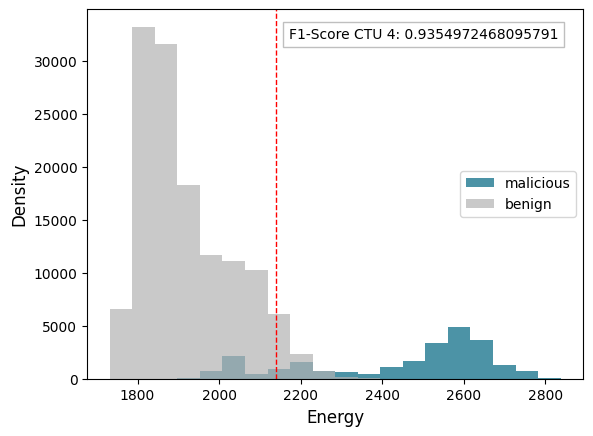

In [ ]:
#@title matplot device 4
from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[3] == 0)[0]
attacks = np.where(testing_labels_CTU[3] != 0)[0]

benign_energies = y_energies_CTU_4[benign]
attacks_energies = y_energies_CTU_4[attacks]

cutoff = devices_CTU[3].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_CTU_4, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"F1-Score CTU 4: 0.9354972468095791"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

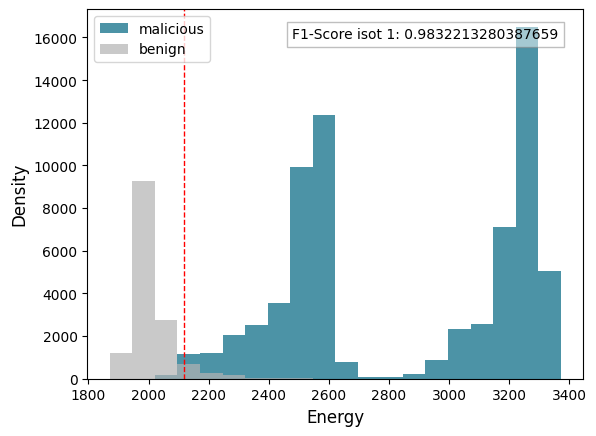

In [ ]:
#@title matplot device 5

from matplotlib import pyplot as plt

benign = np.where(testing_labels_isot[0] == 0)[0]
attacks = np.where(testing_labels_isot[0] != 0)[0]

benign_energies = y_energies_isot_1[benign]
attacks_energies = y_energies_isot_1[attacks]

cutoff = devices_isot[0].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_isot_1, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)

peso_texto = f"F1-Score isot 1: 0.9832213280387659"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

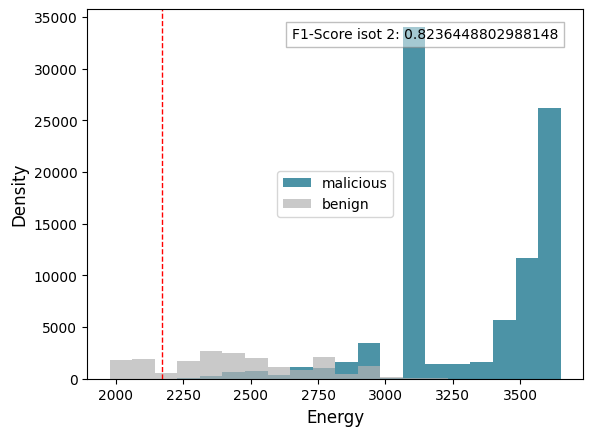

In [ ]:
#@title matplot device 6

from matplotlib import pyplot as plt

benign = np.where(testing_labels_isot[1] == 0)[0]
attacks = np.where(testing_labels_isot[1] != 0)[0]

benign_energies = y_energies_isot_2[benign]
attacks_energies = y_energies_isot_2[attacks]

cutoff = devices_isot[1].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_isot_2, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)

peso_texto = f"F1-Score isot 2: 0.8236448802988148"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

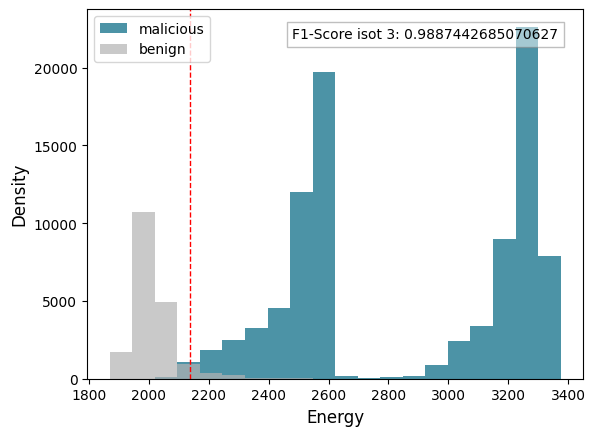

In [ ]:
#@title matplot device 7

from matplotlib import pyplot as plt

benign = np.where(testing_labels_isot[2] == 0)[0]
attacks = np.where(testing_labels_isot[2] != 0)[0]

benign_energies = y_energies_isot_3[benign]
attacks_energies = y_energies_isot_3[attacks]

cutoff = devices_isot[2].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_isot_3, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)

peso_texto = f"F1-Score isot 3: 0.9887442685070627"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

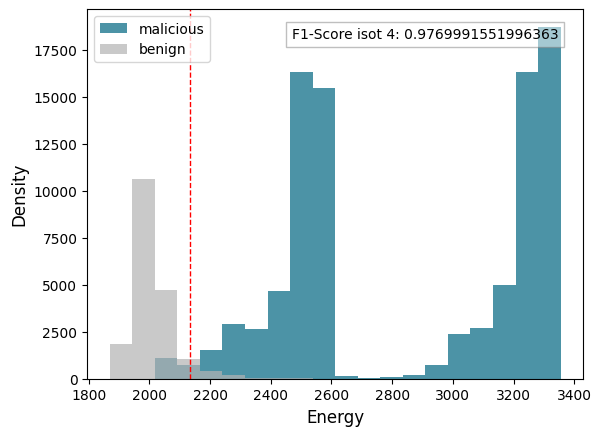

In [ ]:
#@title matplot device 8

from matplotlib import pyplot as plt

benign = np.where(testing_labels_isot[3] == 0)[0]
attacks = np.where(testing_labels_isot[3] != 0)[0]

benign_energies = y_energies_isot_4[benign]
attacks_energies = y_energies_isot_4[attacks]

cutoff = devices_isot[3].clf.estimators_[0].cutoff_

bins = np.histogram(y_energies_isot_4, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)

peso_texto = f"F1-Score isot 4: 0.9769991551996363"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

In [ ]:
#@title f1_score


baseline_benign_preds_CTU = server_CTU.baseline_benign(testing_data_CTU[0],0)
baseline_benign_preds_CTU_2 = server_CTU.baseline_benign(testing_data_CTU[1],0)
baseline_benign_preds_CTU_3 = server_CTU.baseline_benign(testing_data_CTU[2],0)
baseline_benign_preds_CTU_4 = server_CTU.baseline_benign(testing_data_CTU[3],0)

baseline_benign_preds_isot = server_isot.baseline_benign(testing_data_isot[0],0)
baseline_benign_preds_isot_2 = server_isot.baseline_benign(testing_data_isot[1],0)
baseline_benign_preds_isot_3 = server_isot.baseline_benign(testing_data_isot[2],0)
baseline_benign_preds_isot_4 = server_isot.baseline_benign(testing_data_isot[3],0)

classes_CTU = np.unique(testing_labels_CTU[0])
classes_isot = np.unique(testing_labels_isot[0])



baseline_random_preds_CTU = server_CTU.baseline_random(testing_data_CTU[0],classes_CTU)
baseline_random_preds_CTU_2 = server_CTU.baseline_random(testing_data_CTU[1],classes_CTU)
baseline_random_preds_CTU_3 = server_CTU.baseline_random(testing_data_CTU[2],classes_CTU)
baseline_random_preds_CTU_4 = server_CTU.baseline_random(testing_data_CTU[3],classes_CTU)

baseline_random_preds_isot = server_isot.baseline_random(testing_data_isot[0],classes_isot)
baseline_random_preds_isot_2 = server_isot.baseline_random(testing_data_isot[1],classes_isot)
baseline_random_preds_isot_3 = server_isot.baseline_random(testing_data_isot[2],classes_isot)
baseline_random_preds_isot_4 = server_isot.baseline_random(testing_data_isot[3],classes_isot)

# Calculo do f1-score baseline benigno

baseline_benign_CTU_f1 = f1_score(testing_labels_CTU[0], baseline_benign_preds_CTU, average='weighted')
baseline_benign_CTU_2_f1 = f1_score(testing_labels_CTU[1], baseline_benign_preds_CTU_2, average='weighted')
baseline_benign_CTU_3_f1 = f1_score(testing_labels_CTU[2], baseline_benign_preds_CTU_3, average='weighted')
baseline_benign_CTU_4_f1 = f1_score(testing_labels_CTU[3], baseline_benign_preds_CTU_4, average='weighted')

baseline_benign_isot_f1 = f1_score(testing_labels_isot[0], baseline_benign_preds_isot, average='weighted')
baseline_benign_isot_2_f1 = f1_score(testing_labels_isot[1], baseline_benign_preds_isot_2, average='weighted')
baseline_benign_isot_3_f1 = f1_score(testing_labels_isot[2], baseline_benign_preds_isot_3, average='weighted')
baseline_benign_isot_4_f1 = f1_score(testing_labels_isot[3], baseline_benign_preds_isot_4, average='weighted')

# Calculo do f1-score baseline aleatorio

baseline_random_CTU_f1 = f1_score(testing_labels_CTU[0], baseline_random_preds_CTU, average='weighted')
baseline_random_CTU_2_f1 = f1_score(testing_labels_CTU[1], baseline_random_preds_CTU_2, average='weighted')
baseline_random_CTU_3_f1 = f1_score(testing_labels_CTU[2], baseline_random_preds_CTU_3, average='weighted')
baseline_random_CTU_4_f1 = f1_score(testing_labels_CTU[3], baseline_random_preds_CTU_4, average='weighted')

baseline_random_isot_f1 = f1_score(testing_labels_isot[0], baseline_random_preds_isot, average='weighted')
baseline_random_isot_2_f1 = f1_score(testing_labels_isot[1], baseline_random_preds_isot_2, average='weighted')
baseline_random_isot_3_f1 = f1_score(testing_labels_isot[2], baseline_random_preds_isot_3, average='weighted')
baseline_random_isot_4_f1 = f1_score(testing_labels_isot[3], baseline_random_preds_isot_4, average='weighted')

# Calculo do f1-score da base CTU

f1_score_CTU = f1_score(testing_labels_CTU[0], predictions_CTU_1, average='weighted')
f1_score_CTU_2 = f1_score(testing_labels_CTU[1], predictions_CTU_2, average='weighted')
f1_score_CTU_3 = f1_score(testing_labels_CTU[2], predictions_CTU_3, average='weighted')
f1_score_CTU_4 = f1_score(testing_labels_CTU[3], predictions_CTU_4, average='weighted')

# Calculo do f1-score da base isot

f1_score_isot = f1_score(testing_labels_isot[0], predictions_isot_1, average='weighted')
f1_score_isot_2 = f1_score(testing_labels_isot[1], predictions_isot_2, average='weighted')
f1_score_isot_3 = f1_score(testing_labels_isot[2], predictions_isot_3, average='weighted')
f1_score_isot_4 = f1_score(testing_labels_isot[3], predictions_isot_4, average='weighted')

print(f"F1-Score CTU 1: {f1_score_CTU}")
print(f"F1-Score CTU 2: {f1_score_CTU_2}")
print(f"F1-Score CTU 3: {f1_score_CTU_3}")
print(f"F1-Score CTU 4: {f1_score_CTU_4}")

print(f"F1-Score isot 1: {f1_score_isot}")
print(f"F1-Score isot 2: {f1_score_isot_2}")
print(f"F1-Score isot 3: {f1_score_isot_3}")
print(f"F1-Score isot 4: {f1_score_isot_4}")

print(f"F1-Score Baseline BENIGN com CTU: \t1 - {baseline_benign_CTU_f1}\n\t\t\t\t\t2 - {baseline_benign_CTU_2_f1}\n\t\t\t\t\t3 - {baseline_benign_CTU_3_f1}\n\t\t\t\t\t4 - {baseline_benign_CTU_4_f1}\n")
print(f"F1-Score Baseline BENIGN com isot:\t1 - {baseline_benign_isot_f1}\n\t\t\t\t\t2 - {baseline_benign_isot_2_f1}\n\t\t\t\t\t3 - {baseline_benign_isot_3_f1}\n\t\t\t\t\t4 - {baseline_benign_isot_3_f1}\n")

print(f"Classes CTU: {classes_CTU}")
print(f"Classes isot: {classes_isot}")
print(f"F1-Score Baseline Aleatório com CTU: \t1 - {baseline_random_CTU_f1}\n\t\t\t\t\t2 - {baseline_random_CTU_2_f1}\n\t\t\t\t\t3 - {baseline_random_CTU_3_f1}\n\t\t\t\t\t4 - {baseline_random_CTU_4_f1}\n")
print(f"F1-Score Baseline Aleatório com isot:\t1 - {baseline_random_isot_f1}\n\t\t\t\t\t2 - {baseline_random_isot_2_f1}\n\t\t\t\t\t3 - {baseline_random_isot_3_f1}\n\t\t\t\t\t4 - {baseline_random_isot_4_f1}\n")

#pesos_CTU = calcular_pesos(f1_scores_CTU)
#pesos_isot = calcular_pesos(f1_scores_isot)

#print("Pesos CTU:", pesos_CTU,'\nPesos ISOT-HTTP:', pesos_isot)


F1-Score CTU 1: 0.9302926575994297
F1-Score CTU 2: 0.25893804098499806
F1-Score CTU 3: 0.9367241712935491
F1-Score CTU 4: 0.9354972468095791
F1-Score isot 1: 0.9832213280387659
F1-Score isot 2: 0.8236448802988148
F1-Score isot 3: 0.9887442685070627
F1-Score isot 4: 0.9769991551996363
F1-Score Baseline BENIGN com CTU: 	1 - 0.7731995625477758
					2 - 0.7750652469757641
					3 - 0.7738617162119069
					4 - 0.7719211662153614

F1-Score Baseline BENIGN com isot:	1 - 0.051863538944059526
					2 - 0.050332283225835946
					3 - 0.05081921422421991
					4 - 0.05081921422421991

Classes CTU: [0 1]
Classes isot: [0 1]
F1-Score Baseline Aleatório com CTU: 	1 - 0.5673106702914111
					2 - 0.5657619398658358
					3 - 0.5637843026942576
					4 - 0.5680827676148078

F1-Score Baseline Aleatório com isot:	1 - 0.5585783582977115
					2 - 0.5592953238082599
					3 - 0.5616833465148292
					4 - 0.5621070933492434



In [ ]:
pesos = [
      [0.3,0.3,0.2,0.2],[0.3,0.3,0.1,0.3],[0.3,0.2,0.2,0.3],[0.7,0.1,0.1,0.1],
      [0.1,0.7,0.1,0.1],[0.1,0.1,0.7,0.1],[0.1,0.1,0.1,0.7],[0.4,0.2,0.1,0.3],
      [0.3,0.2,0.1,0.4],[0.1,0.6,0.2,0.1],[0.1,0.4,0.4,0.1],[0.1,0.1,0.1,0.7],
      [0.4,0.1,0.1,0.4],[0.1,0.1,0.6,0.2],[0.1,0.1,0.2,0.6],[0.6,0.2,0.1,0.1],
      [0.6,0.1,0.2,0.1],[0.6,0.1,0.1,0.2],[0.1,0.6,0.1,0.2],[0.1,0.1,0.6,0.2],
      [0.1,0.1,0.2,0.6],[0.1,0.6,0.2,0.1],[0.1,0.1,0.6,0.2],[0.1,0.1,0.2,0.6]
    ]


In [ ]:
#@title Agregando com media aritmetica
from re import A
from sklearn.metrics import classification_report

peso_atual = 0

matrizes_Acoplamento_CTU = []
campos_Locais_CTU = []
threshold_CTU = []

matrizes_Acoplamento_isot = []
campos_Locais_isot = []
threshold_isot = []


for i in range(n_devices):
  print(devices_CTU[i].clf.estimators_[0].cutoff_,pesos[peso_atual][i])
  threshold_CTU.append(devices_CTU[i].clf.estimators_[0].cutoff_ * pesos[peso_atual][i])
  matrizes_Acoplamento_CTU.append(devices_CTU[i].clf.estimators_[0].coupling_matrix_ * pesos[peso_atual][i])
  campos_Locais_CTU.append(devices_CTU[i].clf.estimators_[0].local_fields_ * pesos[peso_atual][i])


for i in range(n_devices):
  print(devices_isot[i].clf.estimators_[0].cutoff_,pesos[peso_atual][i])
  threshold_isot.append(devices_isot[i].clf.estimators_[0].cutoff_ * pesos[peso_atual][i])
  matrizes_Acoplamento_isot.append(devices_isot[i].clf.estimators_[0].coupling_matrix_ * pesos[peso_atual][i])
  campos_Locais_isot.append(devices_isot[i].clf.estimators_[0].local_fields_ * pesos[peso_atual][i])

sum_pesos = sum(pesos[peso_atual])

new_threshold_CTU = sum(threshold_CTU)/sum_pesos
new_threshold_isot = sum(threshold_isot)/sum_pesos


acoplamento_CTU, locais_CTU = server_CTU.agregar_modelo_ponderado(matrizes_Acoplamento_CTU, campos_Locais_CTU, sum_pesos)
acoplamento_isot, locais_isot = server_isot.agregar_modelo_ponderado(matrizes_Acoplamento_isot, campos_Locais_isot, sum_pesos)

#acoplamento_CTU, locais_CTU = server_CTU.Agregar_treinamento_media_aritmetica(matrizes_Acoplamento_CTU,campos_Locais_CTU)
#acoplamento_isot, locais_isot = server_isot.Agregar_treinamento_media_aritmetica(matrizes_Acoplamento_isot,campos_Locais_isot)

devices_CTU[0].clf.estimators_[0].coupling_matrix_ = acoplamento_CTU
devices_CTU[0].clf.estimators_[0].local_fields_ = locais_CTU

devices_CTU[1].clf.estimators_[0].coupling_matrix_ = acoplamento_CTU
devices_CTU[1].clf.estimators_[0].local_fields_ = locais_CTU

devices_isot[0].clf.estimators_[0].coupling_matrix_ = acoplamento_isot
devices_isot[0].clf.estimators_[0].local_fields_ = locais_isot

devices_isot[1].clf.estimators_[0].coupling_matrix_ = acoplamento_isot
devices_isot[1].clf.estimators_[0].local_fields_ = locais_isot

display(acoplamento_CTU)
display(acoplamento_isot)

display(locais_CTU)
display(locais_isot)

2138.993809131337 0.3
2160.8894534506726 0.3
2138.581500334269 0.2
2139.2313180528963 0.2
2117.16795144865 0.3
2170.004846776747 0.3
2138.297144719448 0.2
2135.0359901329934 0.2


array([[-1.17187592e+02, -6.02027889e+01, -6.00020002e+01, ...,
        -1.49769086e-14, -1.48214774e-14, -1.39555034e-14],
       [-6.02027889e+01, -1.14250431e+02, -6.00001102e+01, ...,
         5.02708986e-14,  5.14477350e-14,  5.17585974e-14],
       [-6.00020002e+01, -6.00001102e+01, -1.19967654e+02, ...,
        -1.35225164e-14, -1.21125332e-14, -9.50350909e-15],
       ...,
       [ 1.64313008e-15,  4.44422277e-14, -5.63993297e-15, ...,
        -1.20000000e+02, -6.00000000e+01, -6.00000000e+01],
       [ 1.60982339e-15,  4.46753745e-14, -5.63993297e-15, ...,
        -6.00000000e+01, -1.20000000e+02, -6.00000000e+01],
       [ 1.60982339e-15,  4.45754544e-14, -5.63993297e-15, ...,
        -6.00000000e+01, -6.00000000e+01, -1.20000000e+02]])

array([[-1.16027796e+02, -6.07367430e+01, -6.05799759e+01, ...,
        -6.69353462e-14, -6.35491659e-14, -5.92081939e-14],
       [-6.07367430e+01, -1.16553731e+02, -6.04648134e+01, ...,
        -6.76236844e-14, -7.24975635e-14, -5.76982906e-14],
       [-6.05799759e+01, -6.04648134e+01, -1.17104961e+02, ...,
        -3.79696274e-14, -4.02344824e-14, -3.41171535e-14],
       ...,
       [-6.31494856e-14, -3.86246590e-14, -1.96176408e-14, ...,
        -1.20000000e+02, -6.00000000e+01, -6.00000000e+01],
       [-6.31494856e-14, -3.85913523e-14, -1.96176408e-14, ...,
        -6.00000000e+01, -1.20000000e+02, -6.00000000e+01],
       [-6.32272013e-14, -3.85136367e-14, -1.96176408e-14, ...,
        -6.00000000e+01, -6.00000000e+01, -1.20000000e+02]])

array([60.18270454, 60.28998596, 60.00250835, ..., 60.        ,
       60.        , 60.        ])

array([61.12660256, 60.6836272 , 59.49659603, ..., 60.        ,
       60.        , 60.        ])

In [ ]:
# Predict depois da agregação

server_CTU.clf.estimators_[0].cutoff_ = server_CTU.clf.estimators_[0]._define_cutoff()
#devices_CTU[1].clf.estimators_[0].cutoff_ = np.percentile(y_en_CTU_agreg, 95)
y_pred_CTU_agreg, y_en_CTU_agreg = server_CTU.predict(testing_data_CTU[1])

server_isot.clf.estimators_[0].cutoff_ = server_isot.clf.estimators_[0]._define_cutoff()
#devices_isot[1].clf.estimators_[0].cutoff_ = np.percentile(y_en_isot_agreg, 95)
y_pred_isot_agreg, y_en_isot_agreg = server_isot.predict(testing_data_isot[1])

In [ ]:
# Mostrando o cutoff_ depois da agregação
print(devices_CTU[1].clf.estimators_[0].cutoff_)
print(np.unique(y_pred_CTU_agreg))

print(devices_isot[1].clf.estimators_[0].cutoff_)
print(np.unique(y_pred_isot_agreg))

2160.8894534506726
[0 1]
2170.004846776747
[0 1]


In [ ]:
# Mostrando Pesos usados e f1_score resuldados
print(f"\tpesos - {pesos[peso_atual]}\n")

f1_score_CTU_agreg = f1_score(testing_labels_CTU[1], y_pred_CTU_agreg, average='weighted')
f1_score_isot_agreg = f1_score(testing_labels_isot[1], y_pred_isot_agreg, average='weighted')

print(f"f1_score CTU:  {f1_score_CTU_agreg}")
print(f"f1_score isot: {f1_score_isot_agreg}")

	pesos - [0.3, 0.3, 0.2, 0.2]

f1_score CTU:  0.9070342106422625
f1_score isot: 0.9702205552540831


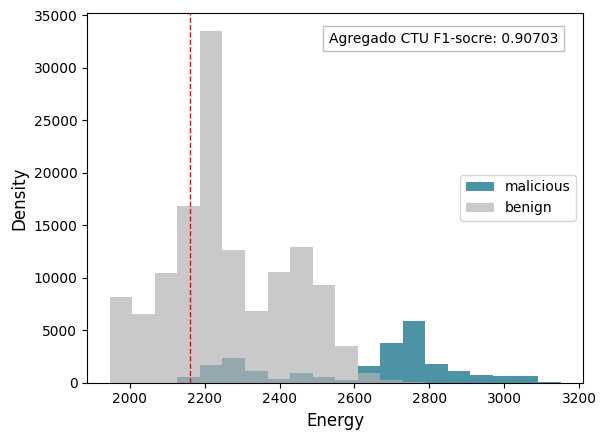

In [ ]:
#@title matplot CTU device agregado

from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[1] == 0)[0]
attacks = np.where(testing_labels_CTU[1] != 0)[0]

benign_energies = y_en_CTU_agreg[benign]
attacks_energies = y_en_CTU_agreg[attacks]

cutoff = server_CTU.clf.estimators_[0].cutoff_

bins = np.histogram(y_en_CTU_agreg, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"Agregado CTU F1-socre: {f1_score_CTU_agreg:.5f}"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

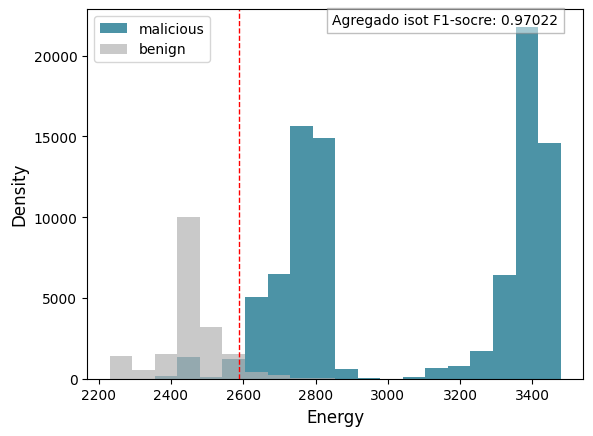

In [87]:
#@title matplot isot device agregado

from matplotlib import pyplot as plt

benign = np.where(testing_labels_isot[1] == 0)[0]
attacks = np.where(testing_labels_isot[1] != 0)[0]

benign_energies = y_en_isot_agreg[benign]
attacks_energies = y_en_isot_agreg[attacks]

cutoff = server_isot.clf.estimators_[0].cutoff_

bins = np.histogram(y_en_isot_agreg, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"Agregado isot F1-socre: {f1_score_isot_agreg:.5f}"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()

In [88]:
#@title Calculado o roc_auc_score

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

CTU_agreg_pred = y_pred_CTU_agreg
isot_agreg_pred = y_pred_isot_agreg

def auc_roc(y_true, y_pred):
    lb = LabelBinarizer()

    lb.fit(y_true)
    y_true_bin = lb.transform(y_true)
    y_pred_bin = lb.transform(y_pred)

    return roc_auc_score(y_true_bin, y_pred_bin, average='weighted')

print(f"auc_roc_score:\n")
print(f"CTU AUC score: {auc_roc(testing_labels_CTU[1],CTU_agreg_pred)}")
print(f"ISOT AUC score: {auc_roc(testing_labels_isot[1],isot_agreg_pred)}")

auc_roc_score:

CTU AUC score: 0.7428130644303025
ISOT AUC score: 0.9621787184649163


In [89]:
'''new_threshold = np.percentile(y_en_CTU_agreg, 95)
devices_CTU[1].clf.estimators_[0].cutoff_ = new_threshold
y_pred_CTU_agreg, y_en_CTU_agreg = devices_CTU[1].predict(testing_data_CTU[1])'''

'new_threshold = np.percentile(y_en_CTU_agreg, 95)\ndevices_CTU[1].clf.estimators_[0].cutoff_ = new_threshold\ny_pred_CTU_agreg, y_en_CTU_agreg = devices_CTU[1].predict(testing_data_CTU[1])'

In [90]:
devices_CTU[1].clf.estimators_[0].cutoff_ = devices_CTU[1].clf.estimators_[0]._define_cutoff()
y_pred_CTU_agreg, y_en_CTU_agreg = devices_CTU[1].predict(testing_data_CTU[1])

In [91]:
print(devices_CTU[1].clf.estimators_[0].cutoff_)
print(np.unique(y_pred_CTU_agreg))

2595.313379098015
[0 1]


In [92]:
f1_score_CTU_agreg = f1_score(testing_labels_CTU[1], y_pred_CTU_agreg, average='weighted')
print(f1_score_CTU_agreg)

0.7861153176212968


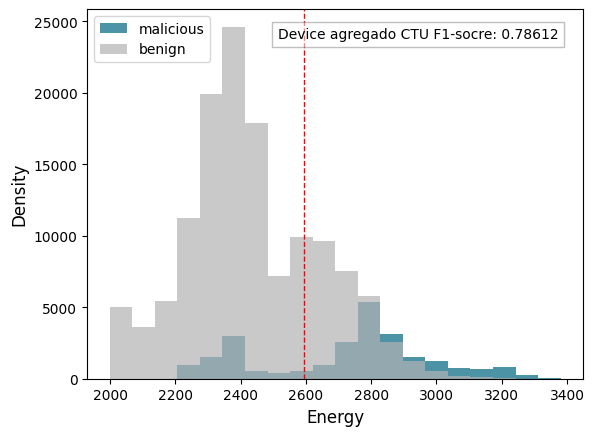

In [93]:
#@title matplot device agregado

from matplotlib import pyplot as plt

benign = np.where(testing_labels_CTU[1] == 0)[0]
attacks = np.where(testing_labels_CTU[1] != 0)[0]

benign_energies = y_en_CTU_agreg[benign]
attacks_energies = y_en_CTU_agreg[attacks]

cutoff = devices_CTU[1].clf.estimators_[0].cutoff_

bins = np.histogram(y_en_CTU_agreg, bins=20)[1]

plt.hist(
    attacks_energies,
    bins,
    facecolor="#006680",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="malicious",
)
plt.hist(
    benign_energies,
    bins,
    facecolor="#b3b3b3",
    alpha=0.7,
    ec="white",
    linewidth=0.3,
    label="benign",
)
plt.axvline(cutoff, color="r", linestyle="dashed", linewidth=1)
peso_texto = f"Device agregado CTU F1-socre: {f1_score_CTU_agreg:.5f}"
plt.text(0.95, 0.95, peso_texto, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
plt.legend()

plt.xlabel("Energy", fontsize=12)
plt.ylabel("Density", fontsize=12)

plt.show()